<a href="https://colab.research.google.com/github/chabazite/DeepLearning_Tensorflow/blob/main/03_neural_network_classification_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network Classification with Tensorflow
- Binary
- Multiclass
- Multilabel

In [1]:
from sklearn.datasets import make_circles


# Make 1000 examples
n_samples = 1000


# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=32)

In [2]:
X[0]

array([-0.07257539,  0.75564179])

In [3]:
y[0]

1

In [4]:
# This is binary classification problem; 2 features and 1 classification
X[0]

array([-0.07257539,  0.75564179])

In [5]:
import numpy as np

In [6]:
X

array([[-0.07257539,  0.75564179],
       [-0.5195304 ,  0.53377845],
       [-0.41659803, -0.69048017],
       ...,
       [ 0.26868795, -0.7365308 ],
       [ 0.55437029,  0.4826766 ],
       [-0.77973356,  0.24702768]])

In [7]:
X_0 = np.take(X, 0, axis = 1)
X_1 = np.take(X, 1, axis = 1)

In [8]:
import matplotlib.pyplot as plt

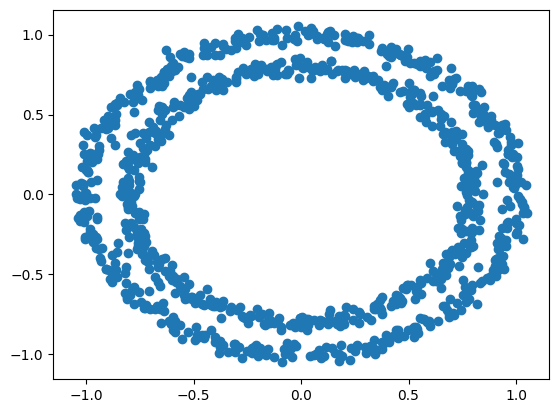

In [9]:
plt.scatter(X_0,X_1)

In [10]:
import pandas as pd
circle = pd.DataFrame({"X0": X[:,0],"X1":X[:,1],"label":y})

In [11]:
circle

,X0,X1,label
0,-0.072575,0.755642,1
1,-0.519530,0.533778,1
2,-0.416598,-0.690480,1
3,-0.646635,0.677087,0
4,-0.484163,-0.670396,1
...,...,...,...
995,0.180147,-0.811181,1
996,-0.719541,-0.689383,0
997,0.268688,-0.736531,1
998,0.554370,0.482677,1


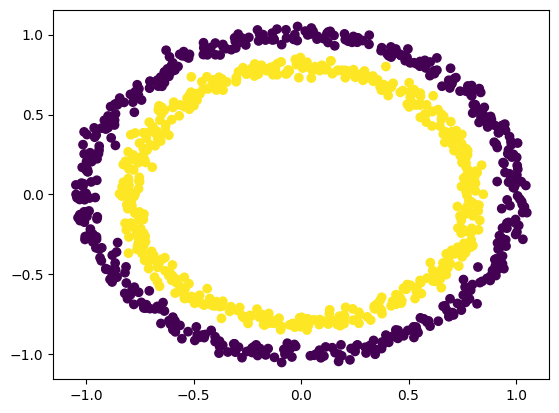

In [12]:
plt.scatter(circle['X0'],circle['X1'], c = circle['label'])

# Steps in model
1. Turn data into Tensors
2. Build Model
3. Compile Model
4. Train Model
5. Evaluate Model

In [13]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
X_train = tf.constant(X_train)
#X_test = tf.constant(X_test)
#y_test = tf.cast(tf.constant(y_test),dtype=tf.float32)
y_train = tf.cast(tf.constant(y_train),dtype=tf.float32)

In [16]:
# Build a model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['accuracy'])

history = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 5ms/step - loss: 0.6960 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5063
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6917 - accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6904 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5013
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5013
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.5013
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5013
Epoch 11/

Text(0.5, 0, 'epochs')

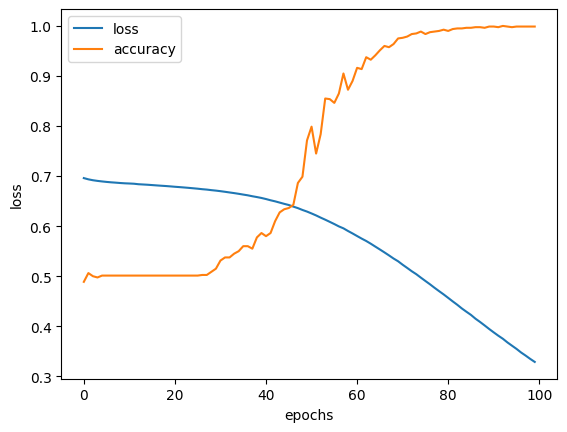

In [17]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [18]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3346 - accuracy: 1.0000


[0.33460548520088196, 1.0]

# To visualize our models predictions, lets create a function 'plot_decision_boundary()'

- Take in trained model, fe atures X and labels y
- createa a meshgrid of different X values
- make predictions across meshgrid
plot predictions as well as a line between zones (where each unique class falls)

In [19]:
import numpy as np

def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.

  CS231m neural networks CNN case study
  madewithml repo
  """
  # Define the axis boundaries of the plot and create a meshgrid from numpy
  x_min, x_max = X[:,0].min() - 0.1, X[:,1].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (and make predictions on them)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multclass classification)")
    y_pred =  np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(), yy.max())


In [20]:
X

array([[-0.07257539,  0.75564179],
       [-0.5195304 ,  0.53377845],
       [-0.41659803, -0.69048017],
       ...,
       [ 0.26868795, -0.7365308 ],
       [ 0.55437029,  0.4826766 ],
       [-0.77973356,  0.24702768]])

313/313 [==============================] - 1s 2ms/step
doing binary classification


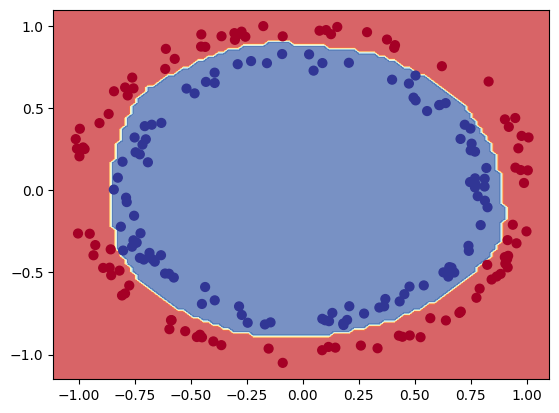

In [21]:
plot_decision_boundary(model,X_test, y_test)

In [22]:
A = tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

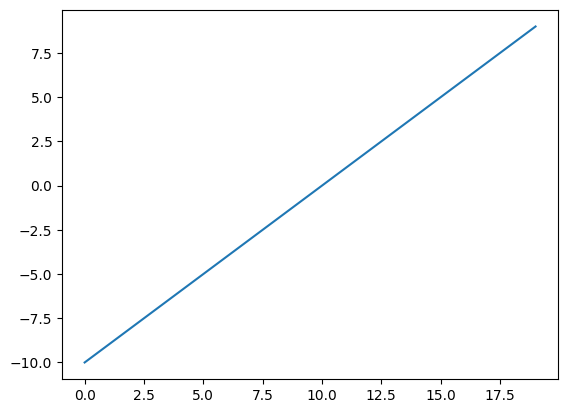

In [23]:
plt.plot(A)

In [24]:
A_z = tf.keras.activations.sigmoid(A)

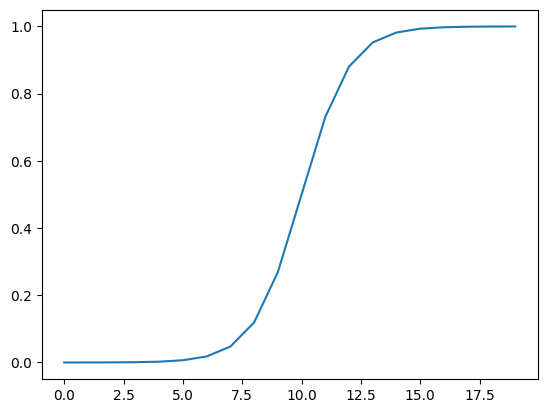

In [25]:
plt.plot(A_z)

In [26]:
# Let's try to just replicate the math behind the sigmoid

def sigmoid (x):
  return 1 / (1 + tf.exp(-x))

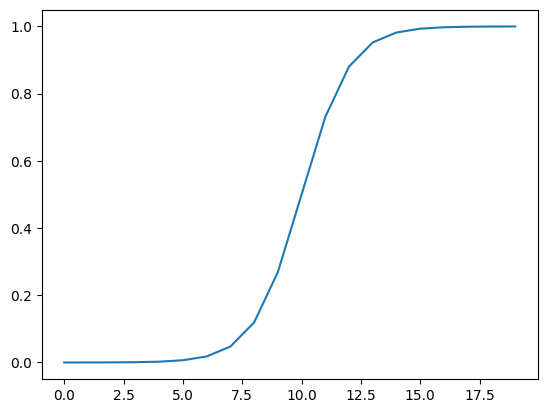

In [27]:
plt.plot(sigmoid(A))

In [28]:
def relu(x):
  return tf.maximum(0,x)

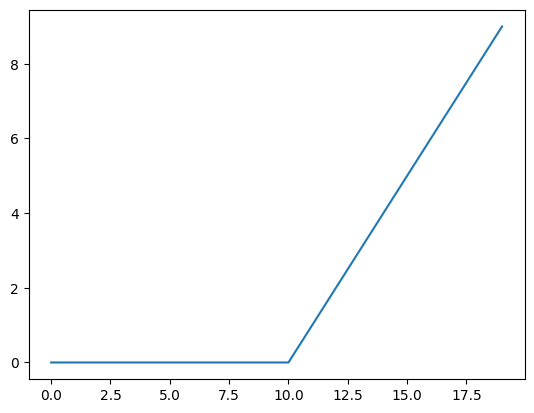

In [29]:
plt.plot(relu(A))

In [30]:
# Visualize Training History

In [31]:
history = pd.DataFrame(history.history)

<Axes: >

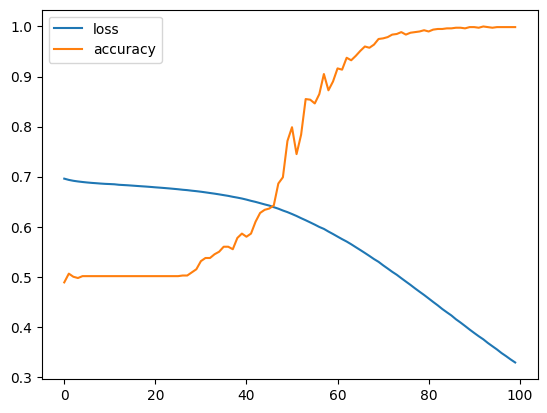

In [32]:
history.plot()

# Finding the ideal learning Rate using callback scheduling

callback is functionality you can access while training


In [33]:
tf.random.set_seed(42)

# Create a model (same as last model)
model_9 = tf.keras.Sequential (
    [
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)
model_9.compile( loss = 'binary_crossentropy',
                optimizer = 'Adam',
                 metrics = ['accuracy'])

# scheduler for LR

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6920 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

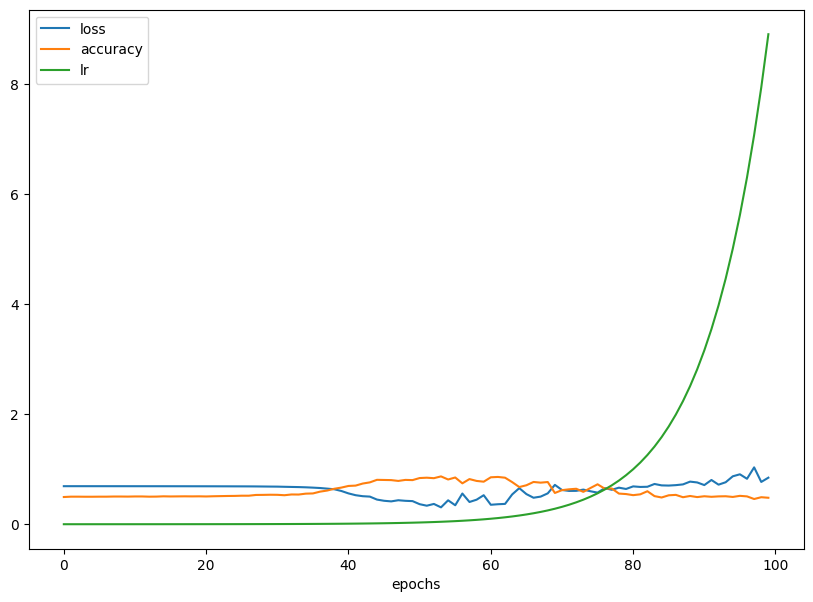

In [34]:
pd.DataFrame(history_9.history).plot(figsize=(10,7),xlabel = 'epochs')

In [35]:
# Let's plot LR over plot

lrs = 1e-4 * (10**(tf.range(100)/20))

In [36]:
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0, 0.5, 'los')

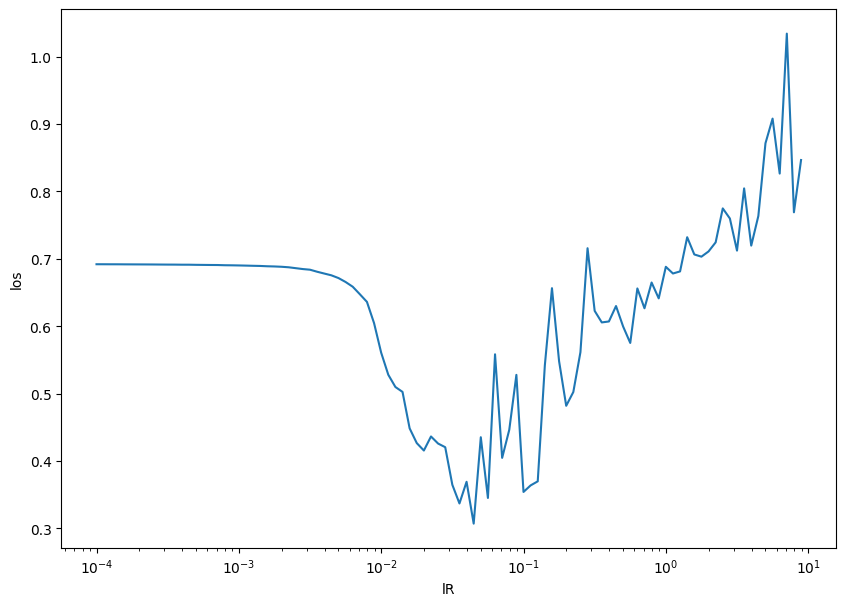

In [37]:
plt.figure(figsize= (10,7))

plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('lR')
plt.ylabel('los')

In [38]:
tf.random.set_seed(42)

# Create a model (same as last model)
model_10 = tf.keras.Sequential (
    [
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ]
)
model_10.compile( loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics = ['accuracy'])


history_10 = model_10.fit(X_train, y_train, epochs = 50)


Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.7065 - accuracy: 0.4975
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.4663
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4837
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.4913
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4863
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.4837
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4812
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4988
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4988
Epoch 10/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5038
Epoch 11/50
25/25 [

<Axes: xlabel='epochs'>

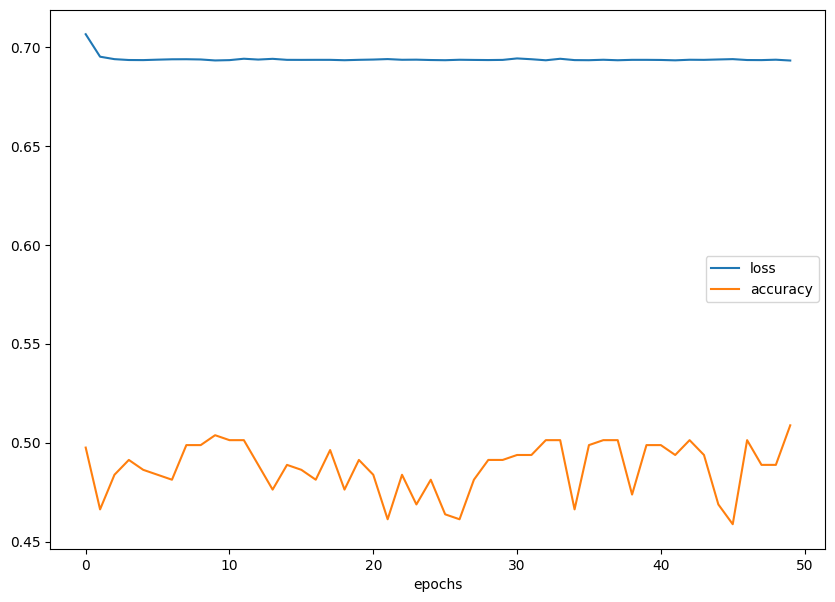

In [39]:
pd.DataFrame(history_10.history).plot(figsize=(10,7),xlabel = 'epochs')

In [40]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5050


[0.6931000351905823, 0.5049999952316284]

## More Classification Eval Metrics
* Acuracy
* Precision
* Recall
* F1-Score
* Confusion Matrix
* Classification Report (sklearn.metrics.classification_report)

In [43]:
loss, accuracy = model_10.evaluate(X_test,y_test)

print(f"Model LOss on the test set: {loss}")
print(f"Model Accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5050
Model LOss on the test set: 0.6931000351905823
Model Accuracy on the test set: 50.50%


## Confusion Matrix

* True positive = model predicts 1 when truth is 1
* True negative = model predict 0 when truth is 0
* False positive = model predicts 1 when truth is 0
* False negative = model predicts 0 when truth is 1

oops...prediction came out as prediction probability form, we want binary, So round them!

In [44]:
from sklearn.metrics import confusion_matrix

y_pred = model_10.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred))

7/7 [==============================] - 0s 2ms/step


array([[  0,  99],
       [  0, 101]])

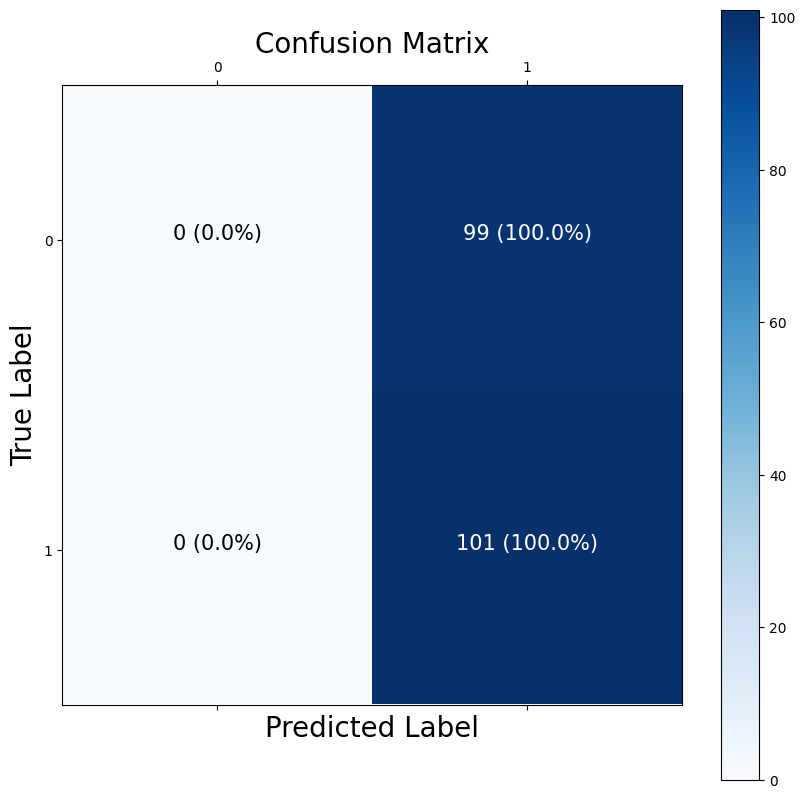

In [45]:
import itertools

figsize = (10,10)

# Create the confusion matrix function

cm = confusion_matrix(y_test, tf.round(y_pred))

cm_norm = cm.astype("float")/ cm.sum(axis = 1)[:,np.newaxis]
n_classes = cm.shape[0]

# Let's prettify it

fig, ax = plt.subplots(figsize = figsize)
# Create matrix plot

cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title = "Confusion Matrix",
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.


for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
  horizontalalignment = "center",
  color = "white" if cm[i,j] > threshold else "black",
  size = 15)

In [46]:
 import itertools
def plot_confusion_matrix(y_test, y_pred, classes = None, text_size = 15, value_size = 10):
  """ CREATE A CONFUSION PLOT MATRIX WITH TENSORFLOW"""

  figsize = (10,10)

  y_pred_round = tf.round(y_pred)

  # Create the confusion matrix function
  cm = confusion_matrix(y_test, y_pred_round)

  cm_norm = cm.astype("float")/ cm.sum(axis = 1)[:,np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)

  # Create matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title = "Confusion Matrix",
       xlabel = 'Predicted Label',
       ylabel = 'True Label',
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels = labels,
       yticklabels = labels)

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} \n ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i,j] > threshold else "black",
      size = value_size)

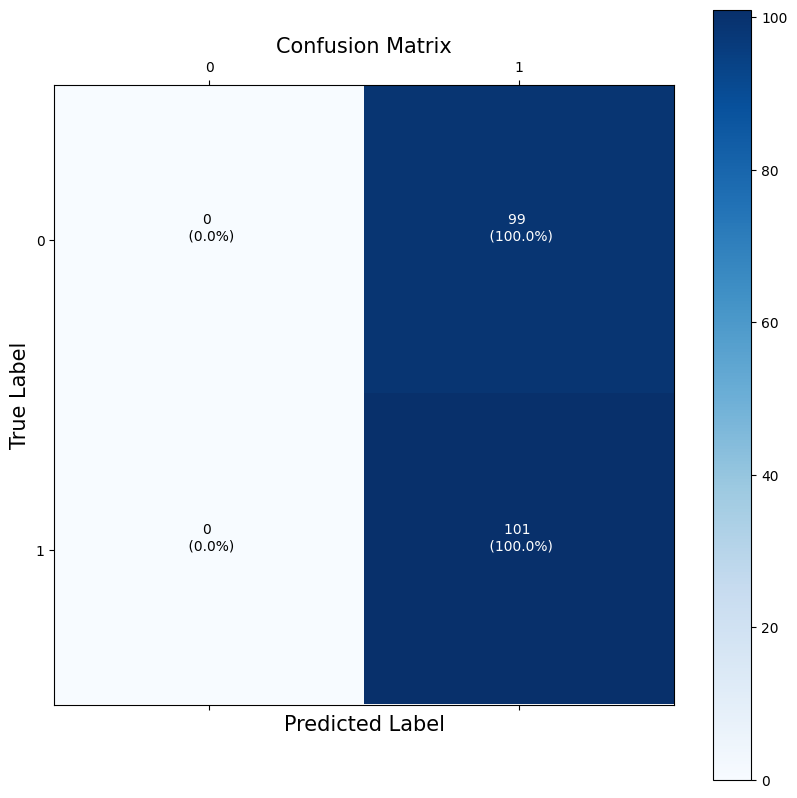

In [47]:
plot_confusion_matrix(y_test,y_pred)

# Working with MultiClass Classification
- When you have more than two classes as an option, it's know as **multi-class classification**
- Rather than choosing 1 or 0, you can choose soup, salad, sandwich. The output is still 1 result, you won't have soup and salad (that's multi-label)


In [48]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already train/test split

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [49]:
print(f"Training Sample:\n{train_data[0]}\m")
print(f"Training label:\n{train_label[0]}\m")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [50]:
# Check shape
train_data[0].shape, train_label[0].shape

((28, 28), ())

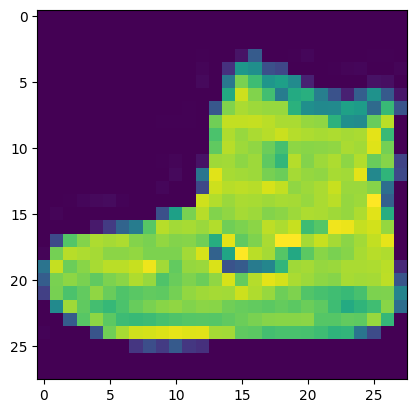

In [51]:
import matplotlib.pyplot as plot
plt.imshow(train_data[0])

In [80]:
# index onto list to make it human readable

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [81]:
len(class_names)

10

TypeError: only integer scalar arrays can be converted to a scalar index

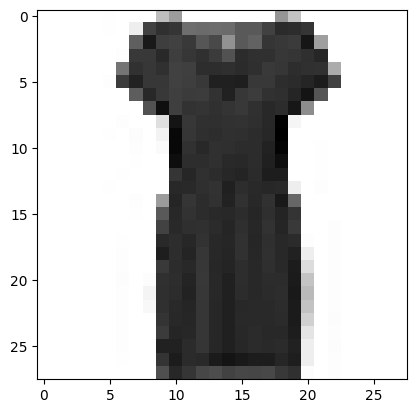

In [82]:
index_of_choice = 20
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_label[index_of_choice]])

TypeError: only integer scalar arrays can be converted to a scalar index

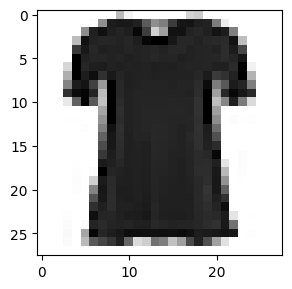

In [83]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis = False

## Build a model for multi-class classification

In [ ]:
len(train_data)

In [ ]:
train_label = train_label.reshape(-1,1)

In [ ]:
train_label.shape

* Input shape: 28 x 28
* Output shape: 10 (one per class)
* need to make dummy variables

In [ ]:
train_label[1]

In [ ]:
train_label_one_hot = tf.one_hot(train_label, depth = 10)
test_label_one_hot = tf.one_hot(test_label, depth = 10)

In [ ]:
train_data_tf = tf.constant(train_data)
test_data_tf = tf.constant(test_data)

In [ ]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_11.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [60]:
non_history = model_11.fit(train_data, tf.squeeze(train_label_one_hot), epochs = 5, validation_data = [test_data,tf.squeeze(test_label_one_hot)])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3243 - accuracy: 0.1001 - val_loss: 2.2407 - val_accuracy: 0.1343
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9400 - accuracy: 0.2048 - val_loss: 1.7632 - val_accuracy: 0.2513
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7342 - accuracy: 0.2482 - val_loss: 1.6895 - val_accuracy: 0.2585
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6908 - accuracy: 0.2588 - val_loss: 1.6747 - val_accuracy: 0.2618
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6735 - accuracy: 0.2630 - val_loss: 1.6583 - val_accuracy: 0.2873


<Axes: xlabel='epochs'>

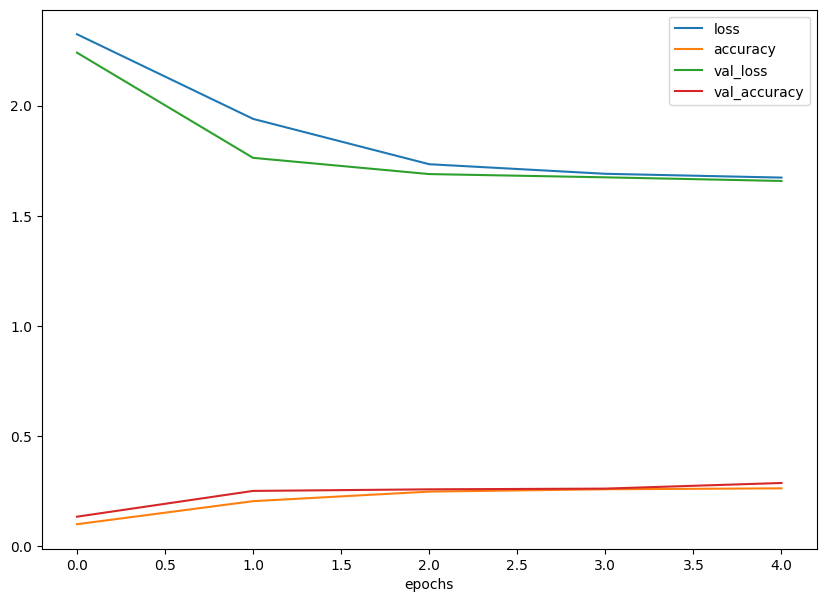

In [61]:
pd.DataFrame(non_history.history).plot(figsize=(10,7),xlabel = 'epochs')

## Normalize the data

In [62]:
train_data.min(), train_data.max()

(0, 255)

In [63]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [64]:
# check min and max
train_data.min(), train_data.max()

(0.0, 1.0)

In [65]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_12.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [66]:
history = model_12.fit(train_data, tf.squeeze(train_label_one_hot), epochs = 25, validation_data = [test_data,tf.squeeze(test_label_one_hot)])

Epoch 1/25
1875/1875 [==============================] - 6s 2ms/step - loss: 1.2162 - accuracy: 0.5636 - val_loss: 0.8988 - val_accuracy: 0.6554
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8385 - accuracy: 0.6882 - val_loss: 0.8474 - val_accuracy: 0.6962
Epoch 3/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7357 - accuracy: 0.7494 - val_loss: 0.7220 - val_accuracy: 0.7641
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6699 - accuracy: 0.7739 - val_loss: 0.6857 - val_accuracy: 0.7734
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6420 - accuracy: 0.7811 - val_loss: 0.6645 - val_accuracy: 0.7815
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6220 - accuracy: 0.7888 - val_loss: 0.6669 - val_accuracy: 0.7793
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6067 - accuracy: 0.7946 - val_loss: 0.6521 - val_accuracy:

<Axes: xlabel='epochs'>

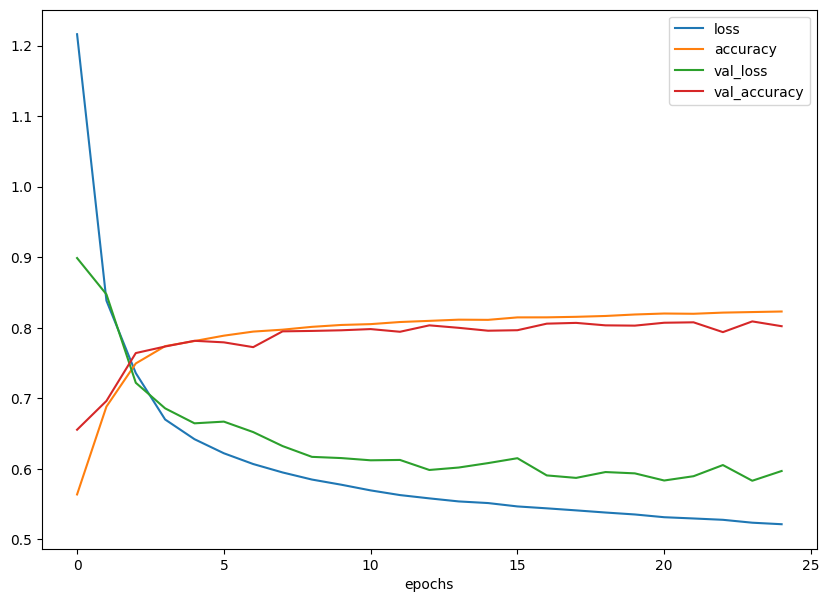

In [67]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel = 'epochs')

In [68]:
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_13.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [69]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data, tf.squeeze(train_label_one_hot), epochs = 25, validation_data = [test_data,tf.squeeze(test_label_one_hot)], callbacks = [lr_scheduler])

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 1.3096 - accuracy: 0.5517 - val_loss: 0.9433 - val_accuracy: 0.7177 - lr: 0.0010
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7602 - accuracy: 0.7542 - val_loss: 0.7007 - val_accuracy: 0.7684 - lr: 0.0011
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6422 - accuracy: 0.7789 - val_loss: 0.6387 - val_accuracy: 0.7795 - lr: 0.0013
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6034 - accuracy: 0.7888 - val_loss: 0.6157 - val_accuracy: 0.7888 - lr: 0.0014
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5875 - accuracy: 0.7946 - val_loss: 0.6096 - val_accuracy: 0.7895 - lr: 0.0016
Epoch 6/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5743 - accuracy: 0.8017 - val_loss: 0.6192 - val_accuracy: 0.7933 - lr: 0.0018
Epoch 7/25
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal LR')

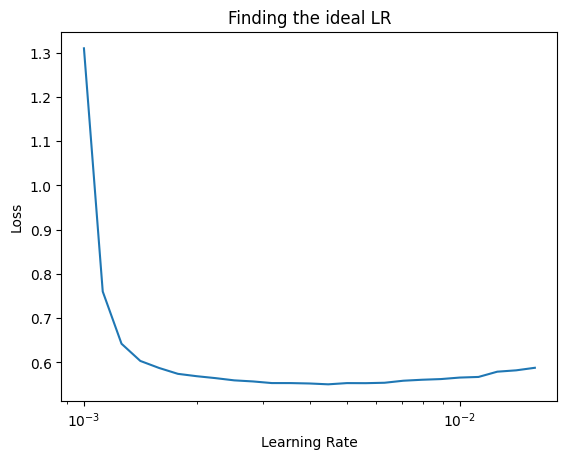

In [70]:
# Plot learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(25)/20))

plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal LR")

In [71]:
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_14.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.002), metrics = ['accuracy'])

find_lr_history = model_14.fit(train_data, tf.squeeze(train_label_one_hot), epochs = 25, validation_data = [test_data,tf.squeeze(test_label_one_hot)])

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1908 - accuracy: 0.5580 - val_loss: 0.8233 - val_accuracy: 0.7266
Epoch 2/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7597 - accuracy: 0.7320 - val_loss: 0.7412 - val_accuracy: 0.7383
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7045 - accuracy: 0.7435 - val_loss: 0.7057 - val_accuracy: 0.7502
Epoch 4/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6696 - accuracy: 0.7602 - val_loss: 0.6855 - val_accuracy: 0.7638
Epoch 5/25
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6500 - accuracy: 0.7688 - val_loss: 0.6671 - val_accuracy: 0.7629
Epoch 6/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6371 - accuracy: 0.7707 - val_loss: 0.6705 - val_accuracy: 0.7686
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6314 - accuracy: 0.7721 - val_loss: 0.6710 - val_accuracy:

<Axes: xlabel='epochs'>

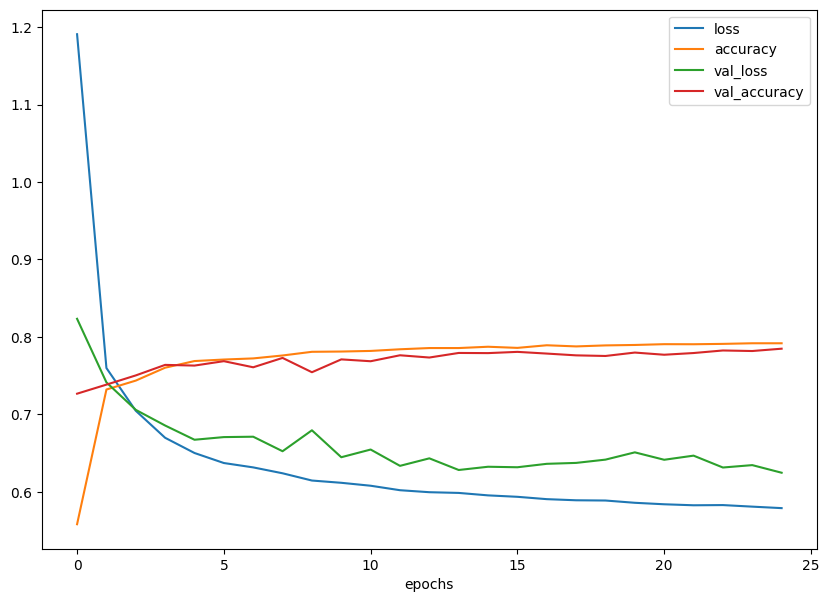

In [72]:
pd.DataFrame(find_lr_history.history).plot(figsize=(10,7),xlabel = 'epochs')

In [73]:
loss, accuracy = model_14.evaluate(test_data, tf.squeeze(test_label_one_hot))

313/313 [==============================] - 1s 3ms/step - loss: 0.6245 - accuracy: 0.7847


In [74]:
y_pred = model_14.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [75]:
y_pred

array([[4.1260611e-14, 8.9095378e-20, 9.1780514e-11, ..., 2.8863946e-01,
        6.7953654e-03, 6.1076719e-01],
       [6.9111734e-06, 4.4168730e-14, 7.8932416e-01, ..., 1.6324669e-09,
        1.7000505e-01, 2.0695448e-12],
       [2.0016058e-04, 9.9755222e-01, 4.7469948e-09, ..., 1.7853428e-16,
        5.4771850e-13, 8.9329927e-10],
       ...,
       [6.4139187e-02, 7.5800075e-05, 1.3351484e-01, ..., 1.8625935e-03,
        2.2490482e-01, 2.2738148e-03],
       [1.5662247e-04, 9.8968208e-01, 1.5399321e-08, ..., 6.5791526e-19,
        7.5352647e-13, 4.2876278e-10],
       [2.4232520e-09, 3.5779793e-14, 1.9130474e-07, ..., 4.9569461e-01,
        1.5358974e-02, 2.5538471e-02]], dtype=float32)

In [77]:
y_pred =tf.argmax(y_pred, axis = 1)
y_true = tf.argmax(test_label_one_hot, axis = 1)

In [78]:
confusion_matrix (y_true = y_true, y_pred = y_pred)

array([[816,   6,  14,  60,   2,   1,  91,   0,  10,   0],
       [ 18, 928,   2,  40,   2,   0,   9,   0,   1,   0],
       [ 41,   0, 634,  21, 124,   0, 167,   0,  13,   0],
       [ 46,  16,  13, 812,  21,   7,  75,   0,   9,   1],
       [  2,   0, 144,  63, 634,   0, 145,   0,  11,   1],
       [  0,   0,   0,   2,   0, 872,   0,  89,   7,  30],
       [202,   3, 157,  57, 136,   1, 419,   0,  25,   0],
       [  0,   0,   0,   0,   0,  42,   0, 929,   1,  28],
       [  9,   0,  27,  15,   3,   9,  22,  15, 898,   2],
       [  0,   0,   0,   2,   0,  25,   0,  63,   5, 905]])

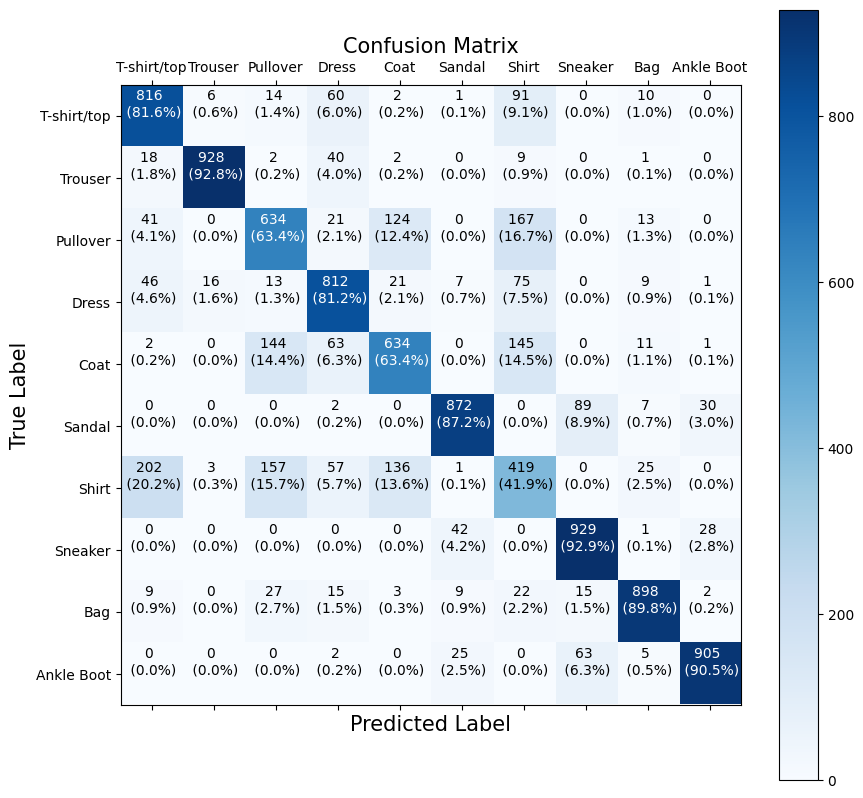

In [84]:
plot_confusion_matrix(y_true,y_pred, classes=class_names, value_size = 10)

In [91]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, ploits it and labels it with a predition and the truth label
  """

  # Set up a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  #Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change color of titles depending on prediction
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel(f"Pred: {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True: {true_label})",color = color)

1/1 [==============================] - 0s 21ms/step


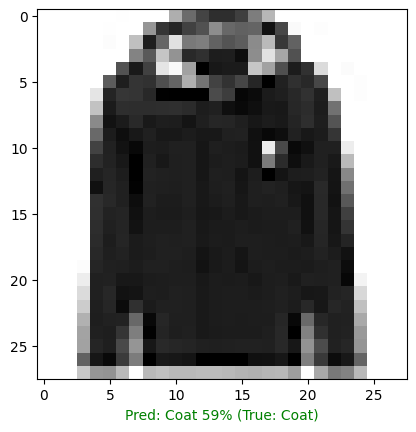

In [114]:
plot_random_image(model_14, test_data, y_true, class_names)

## Learn the patterns of layers

In [115]:
weights, biases = model_14.layers[1].get_weights()

Depending on the shape of your input data AND the number of nodes, your weights will correspond to that.

For example, we have a layer with 4 dense nodes. The first layer takes in a shape of (28,28) OR 784 individual params. Each of those params will have 4 individual weights that the layer will learn, so you should end up with a shape of (784,4) for your weights in layer 1

- weights are randomly initialzied and learned over time

In [116]:
weights.shape

(784, 4)

In [117]:
weights

array([[ 0.36316434,  1.4104491 , -1.3087679 , -0.00938918],
       [ 0.44203126, -0.30009392, -1.9940016 ,  0.0125993 ],
       [ 1.384206  , -1.4385806 , -1.8594793 ,  0.07234381],
       ...,
       [-0.58430433,  0.11849604, -0.40691558,  0.00990966],
       [ 0.63324654,  1.0566814 , -0.80055773, -0.03509159],
       [ 0.9001405 ,  0.8320556 , -0.7619362 ,  0.01402169]],
      dtype=float32)

### Check out biases vector

In [119]:
biases.shape

(4,)

In [120]:
biases

array([-0.05803166,  3.003165  ,  1.313687  , -0.03345212], dtype=float32)

 For every hidden unit (node/neuron) in a layer, there is 1 bias value

 - biases starts or initialized as 0 (TF dense layer)

- biase vector dictates how much the patterns within the corresponding weights matrix nhould influence the next layer



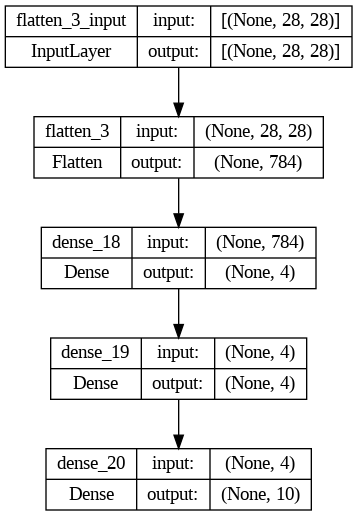

In [124]:
from tensorflow.keras.utils import plot_model

plot_model(model_14, show_shapes= True
          )